<a href="https://colab.research.google.com/github/hargurjeet/MachineLearning/blob/master/Nifty_50_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

High level steps to approach the problem statement

<br> Import the dataset
<br>  Visualize the Time Series Data
<br>  Make the time series data stationary
<br>  Plot the Correlation and AutoCorrelation Charts
<br> Construct the ARIMA Model or Seasonal ARIMA based on the data
<br> Use the model to make predictions


In [53]:
!pip install opendatasets 

In [66]:
# Importing the dataset
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
kaggle_url = 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=TITAN.csv'
od.download(kaggle_url)

Skipping, found downloaded files in "./nifty50-stock-market-data" (use force=True to force download)


In [56]:
file_path = '/content/nifty50-stock-market-data/TITAN.csv'
df = pd.read_csv('/content/nifty50-stock-market-data/TITAN.csv')

df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TITAN,EQ,144.95,146.0,156.45,146.0,155.00,155.70,154.36,23000,3.550370e+11,NaN,NaN,NaN
1,2000-01-04,TITAN,EQ,155.70,152.0,152.00,144.0,148.05,147.40,146.72,26300,3.858700e+11,NaN,NaN,NaN
2,2000-01-05,TITAN,EQ,147.40,144.0,148.80,136.0,139.95,138.40,142.95,20600,2.944850e+11,NaN,NaN,NaN
3,2000-01-06,TITAN,EQ,138.40,142.0,149.50,141.0,149.50,149.50,147.87,31600,4.672750e+11,NaN,NaN,NaN
4,2000-01-07,TITAN,EQ,149.50,149.5,153.00,145.0,147.75,146.35,148.63,36600,5.439965e+11,NaN,NaN,NaN


In [57]:
## Visualize the time series

titan_opening_price = df[['Date', 'Open']]

titan_opening_price.set_index('Date', inplace=True)

titan_opening_price.head()

,Open
Date,
2000-01-03,146.0
2000-01-04,152.0
2000-01-05,144.0
2000-01-06,142.0
2000-01-07,149.5


In [58]:
titan_opening_price.describe()

,Open
count,5306.000000
mean,709.989926
std,785.435092
min,27.000000
25%,192.625000
50%,398.250000
75%,1018.925000
max,4730.000000


In [59]:
titan_opening_price.index.dtype

dtype('O')

In [60]:
titan_opening_price.index = pd.to_datetime(titan_opening_price.index)

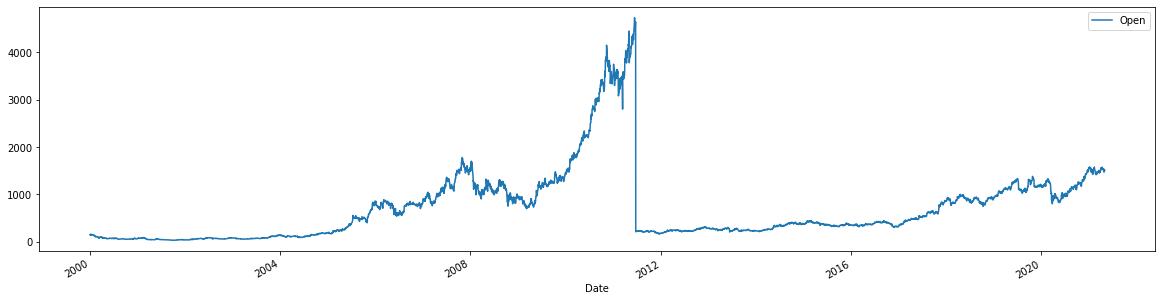

In [61]:
# visualize the data
plt.rcParams['figure.figsize'] = (20, 5)
titan_opening_price.plot() ;

In [62]:
## let us try to calcuate the average monthly sale

titan_opening_price.index = titan_opening_price.index.to_period("M")

In [65]:
titan_opening_price_monthly = titan_opening_price.groupby(titan_opening_price.index).mean()
titan_opening_price_monthly.head()

,Open
Date,
2000-01,143.507500
2000-02,112.580952
2000-03,89.438095
2000-04,80.763889
2000-05,65.427273


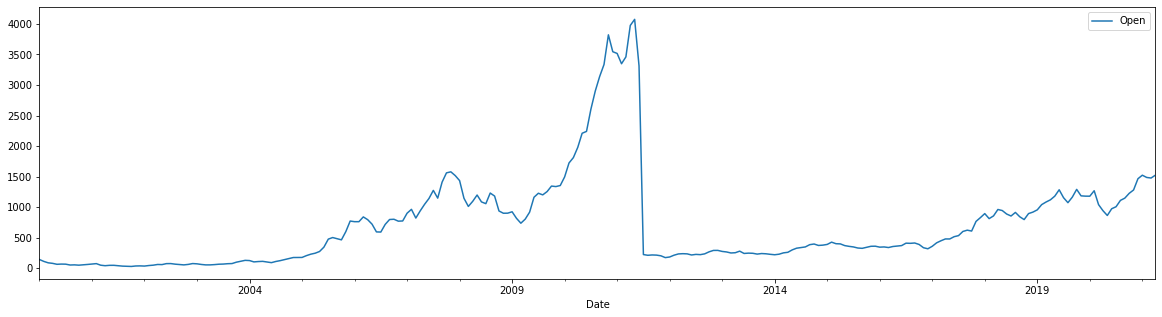

In [63]:
titan_opening_price.groupby(titan_opening_price.index).mean().plot() ;

In [67]:
## testing for stationary
test_result=adfuller(titan_opening_price_monthly['Open'])

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Open):
    result=adfuller(Open)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [68]:
adfuller_test(titan_opening_price_monthly['Open'])

ADF Test Statistic : -2.9191428695593635
p-value : 0.04316679866000191
#Lags Used : 1
Number of Observations Used : 254
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
